In [48]:
from importlib import reload
import matplotlib.pyplot as plt
import dnd
reload(dnd)
from dnd import Dice

import pandas as pd
import numpy as np

In [14]:
dnd.fundamental_math()

,Level_CR,Abl,Prof,Total,AC,Hit_Pcnt
0,1,3,2,5,13,65
1,2,3,2,5,13,65
2,3,3,2,5,13,65
3,4,4,2,6,14,65
4,5,4,3,7,15,65
5,6,4,3,7,15,65
6,7,4,3,7,15,65
7,8,5,3,8,16,65
8,9,5,4,9,16,70
9,10,5,4,9,17,65


In [15]:
dnd.damage_targets()

,Level_CR,Max Expected_HP,Low_DPR,Target_DPR,High_DPR,Dude_Stop,Warlock,TWF_Rogue
0,1,85,3.5,7.1,14.2,28.3,6.30,10.47
1,2,100,4.2,8.3,16.7,33.3,8.25,10.47
2,3,115,4.8,9.6,19.2,38.3,8.25,14.10
3,4,130,5.4,10.8,21.7,43.3,8.90,14.75
4,5,145,6.0,12.1,24.2,48.3,17.80,18.37
5,6,160,6.7,13.3,26.7,53.3,17.80,18.37
6,7,175,7.3,14.6,29.2,58.3,17.80,21.99
7,8,190,7.9,15.8,31.7,63.3,19.10,22.64
8,9,205,8.5,17.1,34.2,68.3,19.10,26.26
9,10,220,9.2,18.3,36.7,73.3,19.10,26.26


In [27]:
Dice(1,6)

1d6

In [29]:
(Dice(1,10) + Dice(2,6)).expectation()

12.5

In [35]:
(Dice(1,10) + Dice(2,6)).roll()

array([7])

In [37]:
(Dice(1,10) + Dice(2,6)).roll(num_simulations=10)

array([16, 12, 11, 10, 13, 17,  9, 14,  9, 16])

In [36]:
(Dice(1,10) + Dice(2,6)).roll(num_simulations=1000).mean()

12.436

Chance to hit: 0.5486
Damage for per round: 10.2929


Text(0, 0.5, 'count')

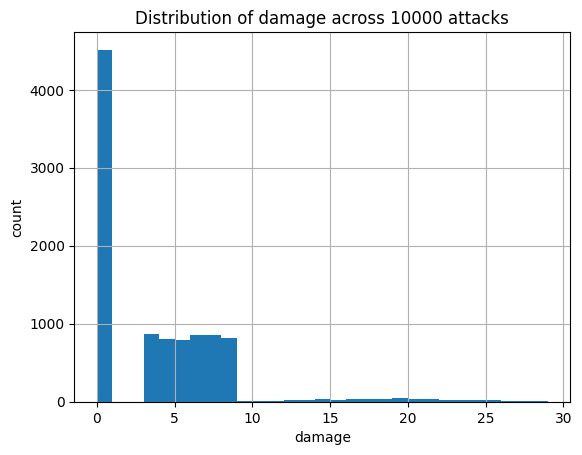

In [51]:
import dnd
from dnd import Dice

level = 6
charisma = 3
strength = 2

pally_attack = dnd.roll_damage(
    defender_AC=dnd.get_AC(level), 
    attack_modifier=dnd.proficency_bonus(level) + strength, 
    damage_dice=Dice(1,6), 
    bonus_damage=strength, 
    crit_added_damage_dice=Dice(2,8), #smite
    advantage=False
)

pam_attack = dnd.roll_damage(
    defender_AC=dnd.get_AC(level), 
    attack_modifier=dnd.proficency_bonus(level) + strength, 
    damage_dice=Dice(1,4), 
    bonus_damage=strength, 
    crit_added_damage_dice=Dice(2,8), #smite
    advantage=False
)


print('Chance to hit:', (pally_attack > 0).mean())
print('Damage for per round:', (pally_attack+pally_attack+pam_attack).mean())

pd.Series(pally_attack).hist(bins=np.arange(0,30))
plt.title("Distribution of damage across 10000 attacks")
plt.xlabel("damage")
plt.ylabel("count")

In [17]:
level = 7
charisma = 3
strength = 2
ability_score = strength
melee_weapon = Dice(1,10)
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack > 0).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.4939
Wisdom saving throw success: 0.5563
Dex saving throw success: 0.4036
Chance to hit: 0.698
Damage for first round: 20.2106
Damage for second round: 28.231


In [18]:
level = 7
charisma = 3
strength = 2
ability_score = strength
melee_weapon = Dice(1,10)+Dice(1,6)
weapon_bonus = 3
bonus_damage = ability_score  + weapon_bonus
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:', dex_saving_throw.mean())

print('Chance to hit:', (pally_attack > 0).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.4951
Wisdom saving throw success: 0.5527
Dex saving throw success: 0.3988
Chance to hit: 0.698
Damage for first round: 21.5134
Damage for second round: 27.3676


In [19]:
level = 8
charisma = 4
strength = 2
ability_score = strength
melee_weapon = Dice(1,10)
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus 
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.5572
Wisdom saving throw success: 0.6494
Dex saving throw success: 0.4895
Chance to hit: 0.6585
Damege per  hit: 10.2747
Damage for first round: 20.3829
Damage for second round: 28.4394


In [20]:
level = 8
charisma = 3
strength = 2
ability_score = strength
melee_weapon = Dice(1,10) + Dice(1,6)
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus 
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.551
Wisdom saving throw success: 0.5949
Dex saving throw success: 0.4576
Chance to hit: 0.6526
Damege per  hit: 12.0289
Damage for first round: 24.0079
Damage for second round: 31.4989


In [21]:
level = 9
charisma = 3
strength = 2
ability_score = strength
melee_weapon = Dice(1,10) + Dice(1,6)
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus 
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.5975
Wisdom saving throw success: 0.6047
Dex saving throw success: 0.41
Chance to hit: 0.7041
Damege per  hit: 12.8745
Damage for first round: 25.7047
Damage for second round: 33.6623


In [22]:
level = 10
charisma = 3
strength = 2
ability_score = charisma
melee_weapon = Dice(1,10) + Dice(1,6)
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus 
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.5929
Wisdom saving throw success: 0.6051
Dex saving throw success: 0.4003
Chance to hit: 0.6842
Damege per  hit: 13.1678
Damage for first round: 26.5701
Damage for second round: 35.1545


In [23]:
Dice(1,20).roll()+4

array([15])

In [24]:
level = 20
charisma = 5
strength = 3
ability_score = charisma 
melee_weapon = Dice(1,10) + Dice(1,8) + Dice(4,8)
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus + 6
smite = None
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':True, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:', dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.7035
Wisdom saving throw success: 0.5517
Dex saving throw success: 0.2378
Chance to hit: 0.9621
Damege per  hit: 47.9647
Damage for first round: 95.9405
Damage for second round: 116.8443


In [25]:
(dnd.roll_damage(18, 12, Dice(1,2), disadvantage=True) > 0).mean()

0.5629

In [26]:
dnd.spell_save(8, 10+level/2).mean()

0.4495

In [257]:
(dnd.roll_damage(22, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)>0).mean()

0.8821

Chace to  hit 0.5442
Chace to be hit 0.7058
Damage per round: 64.0574


<Axes: >

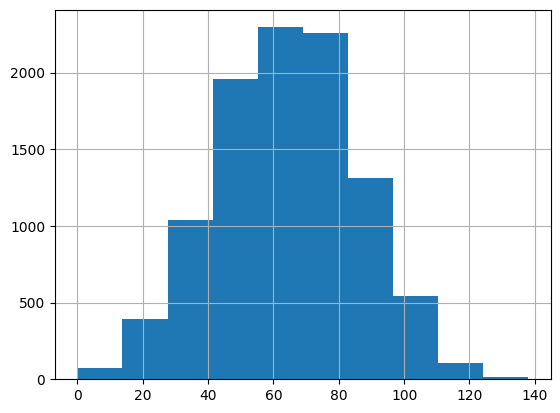

In [221]:
# skeletons 2 short swords
num_skeletons = 4
level = 12
charisma = 5
dex = 2
ability_score = None 
melee_weapon = Dice(1,6) + Dice(1,4)
weapon_bonus = 2
bonus_damage = None 
to_hit = 2 + dex + weapon_bonus
adv = {'advantage':False, 'crit_on':20}
enemy_ac = 16 #dnd.get_AC(level)

AC = 16
chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()


attacks = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=dex + charisma + weapon_bonus, **adv)
print('Chace to  hit', (attacks>0).mean())
attacks += dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage= charisma + weapon_bonus, **adv)
for _ in range(num_skeletons -1):
    attacks += dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=dex + charisma + weapon_bonus, **adv)
    attacks += dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage= charisma + weapon_bonus, **adv)

print('Chace to be hit', chance_to_be_hit)
print('Damage per round:', (attacks).mean())

pd.Series(attacks).hist()

Chace to be hit 0.8032
Damage per round: 112.1627


<Axes: >

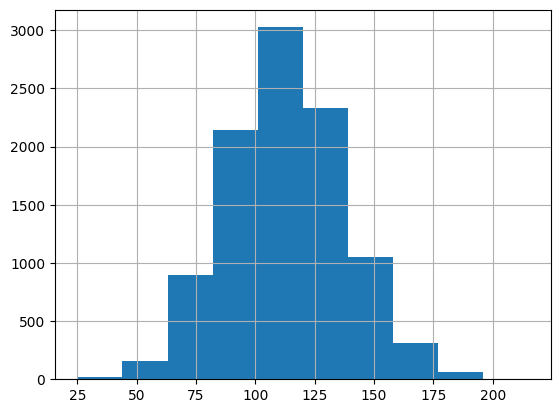

In [207]:
# skeletons bows
num_skeletons = 28
level = 20
charisma = 3
dex = 2
ability_score = None 
melee_weapon = Dice(1,6)
weapon_bonus = 0
bonus_damage = None 
to_hit = 7
adv = {'advantage':False, 'crit_on':20}
enemy_ac = dnd.get_AC(level)

AC = 16
chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()


attacks = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=dex + charisma+ weapon_bonus, **adv)


for _ in range(num_skeletons -1):
    attacks += dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=dex + charisma+ weapon_bonus, **adv)

print('Chace to be hit', chance_to_be_hit)
print('Damage per round:', (attacks).mean())

pd.Series(attacks).hist()

Chace to be hit 0.6949
Damage per round: 7.0573


<Axes: >

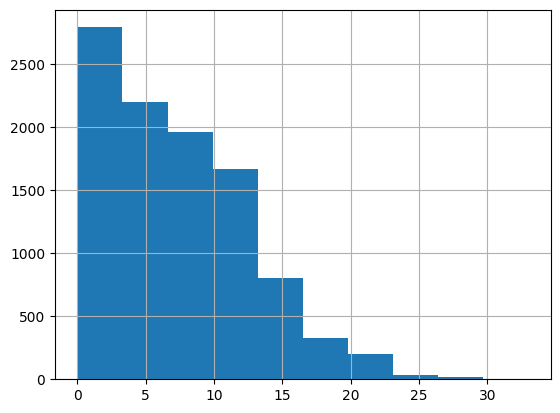

In [193]:
# skeletons bows
num_skeletons = 3
level = 12
charisma = 4
dex = 2
ability_score = None 
melee_weapon = Dice(1,6)
weapon_bonus = 0
bonus_damage = None 
to_hit = 2 + dex + weapon_bonus
adv = {'advantage':False, 'crit_on':20}
enemy_ac = dnd.get_AC(level)

AC = 16
chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()


attacks = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=dex + weapon_bonus, **adv)


for _ in range(num_skeletons -1):
    attacks += dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=dex + weapon_bonus, **adv)

print('Chace to be hit', chance_to_be_hit)
print('Damage per round:', (attacks).mean())

pd.Series(attacks).hist()

In [143]:
level = 12
charisma = 4
strength = 4
ability_score = strength
melee_weapon = Dice(1,10) + Dice(1,8)
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus 
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.357
Wisdom saving throw success: 0.5954
Dex saving throw success: 0.3986
Chance to hit: 0.7438
Damege per  hit: 16.6003
Damage for first round: 33.1268
Damage for second round: 43.8057


In [130]:
level = 12
charisma = 4
strength = 4
ability_score = charisma
melee_weapon = Dice(1,10) + Dice(1,8)
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus 
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.5979
Wisdom saving throw success: 0.5988
Dex saving throw success: 0.4072
Chance to hit: 0.7462
Damege per  hit: 16.6391
Damage for first round: 33.3151
Damage for second round: 43.9656


In [127]:
level = 11
charisma = 4
strength = 3
ability_score = strength
melee_weapon = Dice(1,10) + Dice(1,8) 
weapon_bonus = 3
bonus_damage = ability_score + charisma + weapon_bonus 
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score + weapon_bonus 
adv = {'advantage':False, 'crit_on':20}

enemy_ac = dnd.get_AC(level)
AC = 18
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + charisma + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + charisma, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(AC, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Chance to hit:', (pally_attack2 > 0).mean())
print('Damege per  hit:', (pally_attack2).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.5895
Wisdom saving throw success: 0.5897
Dex saving throw success: 0.3966
Chance to hit: 0.7035
Damege per  hit: 15.0206
Damage for first round: 29.8117
Damage for second round: 39.1762


In [5]:
level = 6
ability_score = 2
melee_weapon = Dice(1,6)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score

pally_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite)
pally_attack2 = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage, crit_added_damage_dice=smite)
pam_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(1,4), bonus_damage, crit_added_damage_dice=smite)

lvl_6_pally = pally_attack + pally_attack2 + pam_attack

wis_saving_throw = dnd.spell_save(-1 + 3 + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + 3, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2)) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Damage per round:', lvl_6_pally.mean())

Chace to be hit 0.3409
Wisdom saving throw success: 0.6605
Dex saving throw success: 0.49
Damage per round: 10.2391


In [6]:
level = 7
ability_score = 2
melee_weapon = Dice(1,6)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score+3

pally_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite)
pally_attack2 = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage, crit_added_damage_dice=smite)
pam_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(1,4), bonus_damage, crit_added_damage_dice=smite)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2)) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.3526
Wisdom saving throw success: 0.5502
Dex saving throw success: 0.3988
Damage for first round: 10.5613
Damage for second round: 15.2529


In [145]:
dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,10)+Dice(1,6), bonus_damage=10).mean()

19.0823

In [7]:
level = 7
ability_score = 3
melee_weapon = Dice(2,6)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score
adv = {}#{'advantage':True, 'crit_on':19}

pally_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,10)+Dice(1,6))
magic_stone = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,6), bonus_damage=ability_score*2)
pally_attack2 = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(1,4), bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2)) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Magic stone round:', magic_stone.mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.3484
Wisdom saving throw success: 0.5964
Dex saving throw: 0.4451
Edritch blast round: 9.2882
Magic stone round: 8.2107
Damage for first round: 13.6156
Damage for second round: 17.5467


In [8]:
level = 8
ability_score = 3
melee_weapon = Dice(2,6)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score*2
adv = {}#{'advantage':True, 'crit_on':19}

pally_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,10)+Dice(1,6))
magic_stone = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,6), bonus_damage=ability_score*2)
pally_attack2 = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(1,4), bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2)) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Magic stone round:', magic_stone.mean())
print('Edritch blast round:', eldrith_blast.mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.3984
Wisdom saving throw success: 0.5916
Dex saving throw success: 0.4553
Magic stone round: 7.4949
Edritch blast round: 8.7422
Damage for first round: 15.7173
Damage for second round: 20.9847


In [9]:
level = 9
ability_score = 4
melee_weapon = Dice(2,6)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score*2
adv = {}#{'advantage':True, 'crit_on':19}

pally_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,10)+Dice(2,6))
pally_attack2 = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(1,4), bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2)) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.4469
Wisdom saving throw success: 0.6561
Dex saving throw success: 0.4534
Edritch blast round: 12.6362
Damage for first round: 21.1131
Damage for second round: 28.4732


In [10]:
level = 10
ability_score = 4
melee_weapon = Dice(2,6)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score*2
adv = {}#{'advantage':True, 'crit_on':19}

pally_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,10)+Dice(2,6), bonus_damage=ability_score*2) 
magic_stone = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(2,6)+Dice(2,6), bonus_damage=ability_score*2)
pally_attack2 = dnd.roll_damage(dnd.get_AC(level), to_hit, melee_weapon, bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(dnd.get_AC(level), to_hit, Dice(1,4), bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2)) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Magic stone round:', magic_stone.mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.4517
Wisdom saving throw success: 0.6502
Dex saving throw success: 0.454
Edritch blast round: 16.4005
Magic stone round: 13.9873
Damage for first round: 19.6675
Damage for second round: 26.4957


In [ ]:
level = 14
ability_score = 5
melee_weapon = Dice(1,6) + Dice(1,8)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level) + ability_score
bonus_damage = ability_score * 2
adv = {'advantage':False, 'crit_on':19}
enemy_ac = dnd.get_AC(level)
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10)+Dice(3,6), bonus_damage=ability_score*3) 
normal_skele = dnd.roll_damage(enemy_ac, 2, Dice(3,6), bonus_damage=2) 

magic_stone = dnd.roll_damage(enemy_ac, to_hit, Dice(3,6), bonus_damage=ability_score*3)
magic_stone_eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10), bonus_damage=ability_score*3) 

pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Magic stone round:', (magic_stone_eldrith_blast+magic_stone).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

In [33]:
level = 14
ability_score = 5
melee_weapon = Dice(1,6)+Dice(1,8)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score*2
adv = {'advantage':False, 'crit_on':19}
enemy_ac = dnd.get_AC(level)
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10)+Dice(3,6), bonus_damage=ability_score*3) 
normal_skele = dnd.roll_damage(enemy_ac, 2, Dice(3,6), bonus_damage=2) 

magic_stone = dnd.roll_damage(enemy_ac, to_hit, Dice(3,6), bonus_damage=ability_score*3)
magic_stone_eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10), bonus_damage=ability_score*3) 

pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Magic stone round:', (magic_stone_eldrith_blast+magic_stone).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.4907
Wisdom saving throw success: 0.6573
Dex saving throw success: 0.3969
Edritch blast round: 28.882
Magic stone round: 38.2805
Damage for first round: 26.8412
Damage for second round: 36.2194


In [34]:
level = 14
ability_score = 5
melee_weapon = Dice(1,6)+Dice(1,8)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score*2
adv = {'advantage':True, 'crit_on':19}
enemy_ac = dnd.get_AC(level)
attackers_disadvantage = True

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10)+Dice(3,6), bonus_damage=ability_score*3) 
normal_skele = dnd.roll_damage(enemy_ac, 2, Dice(3,6), bonus_damage=2) 

magic_stone = dnd.roll_damage(enemy_ac, to_hit, Dice(3,6), bonus_damage=ability_score*3)
magic_stone_eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10), bonus_damage=ability_score*3) 

pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Magic stone round:', (magic_stone_eldrith_blast+magic_stone).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.2512
Wisdom saving throw success: 0.6517
Dex saving throw success: 0.3972
Edritch blast round: 28.3892
Magic stone round: 38.684
Damage for first round: 38.2526
Damage for second round: 51.295


In [91]:
damage = 50.0 
level = 15
con = 8 
dex = 4
chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2), disadvantage=True) > 0).mean()

spell_save = dnd.advantage_roll(advantage=False, disadvantage=False, num_simulations=4000)

fail_spell_save = (19 > (dex + spell_save)).mean()

con_save = dnd.advantage_roll(advantage=False, disadvantage=False, num_simulations=4000)
con_DC = max(10.0, damage/2.0)
fail_con_check = (con_DC > (con_save+con)).mean() 

print('probablity to lose concentration (attack)', chance_to_be_hit * fail_con_check)
print('probablity to lose concentration (dex save)', fail_spell_save * fail_con_check)

probablity to lose concentration (attack) 0.20191420000000004
probablity to lose concentration (dex save) 0.3551165


In [92]:
level = 20
ability_score = 5
melee_weapon = Dice(1,6)+Dice(1,8)
smite = Dice(2,8)
to_hit = dnd.proficency_bonus(level)+ability_score
bonus_damage = ability_score*2
adv = {'advantage':False, 'crit_on':19}
enemy_ac = dnd.get_AC(level)
attackers_disadvantage = False

pally_attack = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10)+Dice(3,6), bonus_damage=ability_score*3) 
normal_skele = dnd.roll_damage(enemy_ac, 2, Dice(3,6), bonus_damage=2) 

magic_stone = dnd.roll_damage(enemy_ac, to_hit, Dice(3,6), bonus_damage=ability_score*3)
magic_stone_eldrith_blast = dnd.roll_damage(enemy_ac, to_hit, Dice(3,10), bonus_damage=ability_score*3) 

pally_attack2 = dnd.roll_damage(enemy_ac, to_hit, melee_weapon, bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)
pam_attack = dnd.roll_damage(enemy_ac, to_hit, Dice(1,4), bonus_damage=bonus_damage, crit_added_damage_dice=smite, **adv)

wis_saving_throw = dnd.spell_save(-1 + ability_score + dnd.proficency_bonus(level), 10+level/2)
dex_saving_throw = dnd.spell_save(-1 + ability_score, 10+level/2)

chance_to_be_hit = (dnd.roll_damage(21, dnd.attack_bonus(level), Dice(1,2), disadvantage=attackers_disadvantage) > 0).mean()

print('Chace to be hit', chance_to_be_hit)
print('Wisdom saving throw success:', wis_saving_throw.mean())
print('Dex saving throw success:',dex_saving_throw.mean())

print('Edritch blast round:', eldrith_blast.mean())
print('Magic stone round:', (magic_stone_eldrith_blast+magic_stone).mean())
print('Damage for first round:', (pally_attack + pally_attack2).mean())
print('Damage for second round:', (pally_attack + pally_attack2 + pam_attack).mean())

Chace to be hit 0.5423
Wisdom saving throw success: 0.5462
Dex saving throw success: 0.2522
Edritch blast round: 28.2727
Magic stone round: 38.1506
Damage for first round: 26.997
Damage for second round: 36.2165
